## IMD0033 - Probabilidade

# Trabalho I 

Este trabalho servirá como avaliação dos conteúdos relacionados a Estatística Descritiva. Responda às questões abaixo.

Data de entrega: Até 12:00 do dia 14/09

Forma de entrega: Via SIGAA na forma de um jupyter notebook ou na forma de um documento em um editor de texto (word).

Qualquer dúvida escreva para tetsu@imd.ufrn.br.

### Questão 1

Defina com suas palavras e de forma sucinta os termos abaixo:

a) População

Resposta: Conjunto total de dados a serem estudados e analisados estatisticamente com a finalidade de gerar alguma informação sobre a mesma.

b) Amostra

Resposta: Subconjunto de uma população. Tem como objetivo tornar mais prático a análise estatística de grandes populações.

c) Conceito (em um desenho experimental)

Resposta:

d) Definição operacional

Resposta: Termo técnico que atribui um conceito específico em uma determinada circustância. Esta, evita conflitos e gera clareza a todos as pessoas envolvidas.

e) Experimento controlado

Resposta: Estudo feito quando se tem o objetivo de verificar se uma determinada variável causa um efeito direto na situação.

f) Desvio

Resposta: Medida de dispersão que verifica a regularidade de um conjunto de dados, ou seja, mostra o quanto os dados deste conjunto diverge entre si.

g) Correção de Bessel

Resposta:

h) Outlier

Resposta: Resultado atípico em uma análise estatística, valor que foge da normalidade. 

### Questão 2

Reflita sobre as seguintes afirmações, indique se é verdadeiro ou falso e justifique:

a) Se a média de um conjunto de dados é 50, podemos certamente afirmar que os dados encontram-se próximos de 50.

Resposta:Falso. Não é possível afirmar com certeza tal afirmação pois estes dados podem estar com um alto desvio.

b) A variância é a média dos desvios ao quadrado.

Resposta:Falso. Variância é a média das somas dos desvios ao quadrado.

c) Quando transformamos os dados através do z-score, a mediana dos dados transformados é sempre 0.

Resposta:Verdadeiro. Os dados geram uma distribuição normal padrão quando transformados em z-score.

d) Ao analisar a correlação entre duas variáveis, se verificarmos uma correlação de 0.9, o que é considerada alta, podemos certamente afirmar que a variável dependente é a causa da variação nos valores da variável independente.

Resposta:Falso. Uma correlação de 0.9 apenas indica uma forte associação, não sendo possível afirmar tal afirmação.

### Questão 3

Baixe o arquivo que se encontram neste [link](https://raw.githubusercontent.com/tetsufmbio/IMD0033/master/trabalhoI/CO2_emission.txt). Este arquivo contém dados de emissão de CO2 em kT (quilotonelada) emitido pelos países ao longo no período de 2000 a 2014. Desconsiderando aqueles países que apresentam valores faltantes (".."), responda:

a) Qual foi o país que menos emitiu CO2 ao longo destes anos?

In [15]:
import numpy as np                     
import matplotlib.pyplot as plt

f = open("CO2_emission.txt", "r")
firstLine = f.readline()
cells = firstLine.split("\t")

ncol = len(cells)



country = []
data = np.empty((1, 15))

idx = 0


aux2 = ".." #Variável auxiliar para ajudar na retirada dos país sem valores do arquivo de texto. 


for row in f:
    if aux2 not in row:
        row = row.replace("\n", "")
        cells = row.split("\t")
        country.append(cells[2])
        cells[2] = idx
        idx += 1
        
        for y in range(4,len(cells)):
            if(cells[y]):
                cells[y] = float(cells[y])
        
            else:
                cells[y] = 0
        
        ins = np.array([cells[4:]])
        data = np.append(data, ins, axis=0)
        
        
soma = np.empty((0,204))
for i in range(0,5):  #Removendo espaços em brancos que ficaram no final da lista.
    country.pop()
    


aux = 0
for i in range(0,204):
    soma = np.insert(soma, aux, data[i].sum())
    aux += 1


    
soma = np.delete(soma,(199,200,201,202,203), axis=0) #Deletando os valores iguais a 0(Estão aparecendo, porém não sei a razão)



pais = 0;





for i in range(1,199):
    if data[i].sum() == soma.min():
        print("País que menos emitiu CO2 ao longo dos anos: ")
        print(country[i-1]) #Por algum motivo e depois de vários testes e tentativas, o número correspondente ao país é sempre uma unidade menor.


        


País que menos emitiu CO2 ao longo dos anos: 
Tuvalu


b) Qual foi o país que teve a maior taxa média de emissão de CO2 ao longo destes anos? Considere a taxa de emissão de CO2 de cada ano como sendo a relação entre a quantidade de CO2 emitido em um ano com a do ano anterior.

In [18]:
#Interpretei a questão da seguinte forma: Para cada país, calculei sua taxa de emissão de seu respectivo ano com o anterior e fiz um somatório.
#Em seguida, calculei a média desses valores
#para então compará-los e verificar qual possuía a maior média(taxa média) durante esse período.






count = 0

indPais = 1

idx = 0

idx2 = 0

values = np.empty((0,204))


somatorio = 0

#for y in range(0,14):
#    pool = data[1, y+1]/data[1, y]
#    somatorio += pool
#    taxa = somatorio/15
    
#print(country[0])    
#print(taxa)

while indPais < 204:
    test = data[indPais,idx+1]/data[indPais,idx]
    idx += 1
    count += test
    
    if idx == 14:
        taxaMedia = count/15
        values = np.insert(values, idx2, taxaMedia)
        count = 0
        idx = 0
        idx2 +=1
        indPais += 1
        
    


values = np.delete(values,(198,199,200,201,202), axis=0) #Mesmo caso anterior, valores não condizentes nas últimas 5 posições. Por isso, a remoção


maiorTaxa = values.max()

print("Esta é a maior taxa média: ") #Encontrei dificuldades em conseguir linkar a taxa com a lista de países
print(maiorTaxa)




    



Esta é a maior taxa média: 
1.3719108358907348


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


c) Quantos países conseguiram diminuir a emissão de CO2 durante este período? Em outras palavras, quantos países tiveram sua taxa média de emissão de CO2 menor que 1?

In [19]:
t = values < 1.0

print("Número de países:")
print(t.sum())


Número de países:
163


d) Qual foi a taxa média de emissão de CO2 do Brasil ao longo destes anos?

In [20]:
b = "Brazil"

for i in range(0, len(country)):
    if country[i] == b:
        bb = data[i+1] #Guarda os dados de emissões do Brasil
add = 0        

for k in range(0, 14):
    pool = bb[k+1]/bb[k]
    add += pool

taxa = add/15
print("Taxa de CO2 do Brasil ao longo dos anos: ")    
print(taxa)


Taxa de CO2 do Brasil ao longo dos anos: 
0.9668872198140176


e) A taxa média de emissão de CO2 entre os países segue aproximadamente uma distribuição normal como mostra o gráfico abaixo. Dos países que estamos analisando, quantos deles possuem a taxa média maior que a taxa média brasileira? 

![image.png](attachment:image.png)

In [21]:
p = values > taxa

print("Número de países:")
print(p.sum())

Número de países:
89


f) A Noruega é um dos países que vem fazendo esforço para diminuir a emissão de CO2. Abaixo se encontra o gráfico que demonstra a quantidade de CO2 emitido por este país ao longo do período apresentado pelos dados. Tendo em mente este padrão de emissão de CO2 da Noruega, qual o país que possui um padrão de emissão de CO2 mais similar ao padrão da Noruega? Plote um gráfico que consiga demonstrar a semelhança dos padrões de emissão de CO2 entre os dois países.
![image.png](attachment:image.png)

Norway
[39673.273 41910.143 38023.123 45221.444 42647.21  42438.191 44257.023
 45089.432 55690.729 55346.031 60105.797 45195.775 49889.535 58162.287
 47626.996]
6659.233481131869


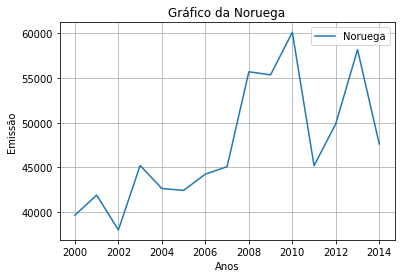

198


In [22]:
n = "Norway"
print(n)

for i in range(0, len(country)):
    if country[i] == n:
        nn = data[i+1] #Guarda os dados de emissões da Noruega
        
print(nn)

print(np.std(nn))

x = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])
y = nn

plt.plot(x,y, label="Noruega")
plt.title("Gráfico da Noruega")
plt.xlabel("Anos")
plt.ylabel("Emissão")
plt.legend()
plt.grid()
plt.show()

print(len(country))

sv = np.empty((0,198))

idx3 = 0
for i in data:
    sv = np.insert(sv,idx3, np.std(i))



In [23]:
f.close()